In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install tensorflow-gpu==2.0.0-beta0
!pip install librosa
!pip install noisereduce    
!pip install soundfile

In [ ]:
!pip install MediaInfo
!pip install audio-metadata

In [ ]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import io
%matplotlib inline
from scipy.io.wavfile import write
from scipy.io.wavfile import read

In [4]:
import audio_metadata
from MediaInfo import MediaInfo

In [7]:
wav_loc = "/content/drive/MyDrive/CAPSTONE/Philippineexample/full length audio files/2_.wav"
rate, data = wavfile.read(wav_loc)
data = data
metadata = audio_metadata.load(wav_loc)
print(metadata['streaminfo'])

<WAVEStreamInfo({
    'audio_format': <WAVEAudioFormat.PCM>,
    'bit_depth': 16,
    'bitrate': '128 Kbps',
    'channels': 1,
    'duration': '08:04',
    'sample_rate': '8.0 KHz',
})>


In [8]:
IPython.display.Audio(data=data, rate=rate)

Output hidden; open in https://colab.research.google.com to view.

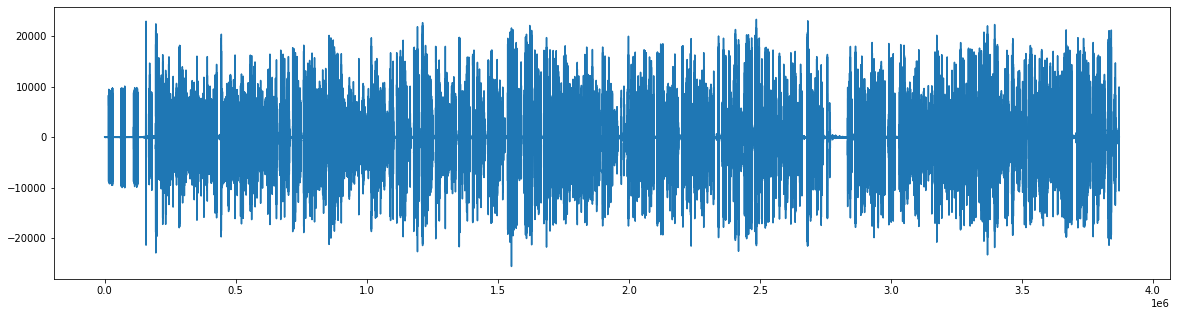

In [9]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(data)

In [10]:
data = data / 32768
noise_reduced = nr.reduce_noise(audio_clip=data,noise_clip=data,n_grad_freq=5,n_grad_time=4, prop_decrease=1.0, verbose=False)
write("/content/drive/MyDrive/CAPSTONE/Philippineexample/full length audio files/4_afternoiseremoval.wav", 8, noise_reduced)
metadata = audio_metadata.load("/content/drive/MyDrive/CAPSTONE/Philippineexample/full length audio files/4_afternoiseremoval.wav")
print(metadata['streaminfo'])

<WAVEStreamInfo({
    'audio_format': <WAVEAudioFormat.IEEE_FLOAT>,
    'bit_depth': 64,
    'bitrate': '512 bps',
    'channels': 1,
    'duration': '134:26:24',
    'sample_rate': '8.0 Hz',
})>


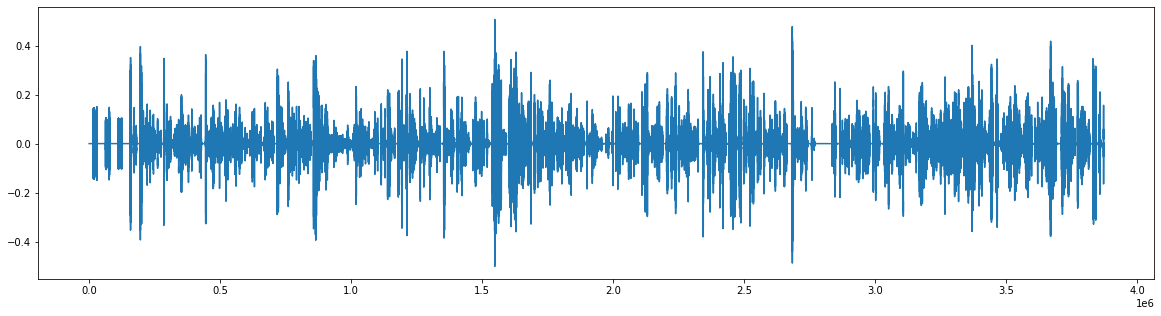

In [11]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(noise_reduced)

In [12]:
IPython.display.Audio(data=noise_reduced, rate=rate)

Output hidden; open in https://colab.research.google.com to view.